# Board Level Strategic Insight Request
## Data Analyst: Althea Jane R. Trinidad
## Date of Request: September 28, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from scipy import stats
 from pathlib import Path

In [ ]:
df = pd.read_excel("HypotheticalLoansData.xlsx")

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


,Income,CreditScore,EmploymentYears,DebtToIncome,Age,LoanAmount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,60102.569780,701.591200,14.312000,0.298900,42.544000,87561.532960
std,14718.798391,48.900041,8.517026,0.096851,12.714219,13021.297761
min,11380.990000,565.160000,0.000000,0.010000,21.000000,53960.780000
25%,49495.390000,670.235000,7.000000,0.230000,31.750000,78285.482500
50%,60191.960000,701.430000,14.000000,0.300000,42.500000,87579.970000
75%,69551.752500,732.562500,22.000000,0.360000,54.000000,96888.517500
max,117790.970000,831.620000,29.000000,0.570000,64.000000,119076.870000


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

# Correlation matrix

In [ ]:
correlation_matrix = numerical_df.corr()
correlation_matrix

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,LoanAmount
Income,1.000000,-0.075671,-0.059628,0.103445,-0.016165,0.240972
CreditScore,-0.075671,1.000000,0.017494,0.001673,0.034752,0.343985
EmploymentYears,-0.059628,0.017494,1.000000,0.040090,-0.000016,0.308620
DebtToIncome,0.103445,0.001673,0.040090,1.000000,-0.042250,-0.211895
Age,-0.016165,0.034752,-0.000016,-0.042250,1.000000,-0.034823
LoanAmount,0.240972,0.343985,0.308620,-0.211895,-0.034823,1.000000


# Heatmap

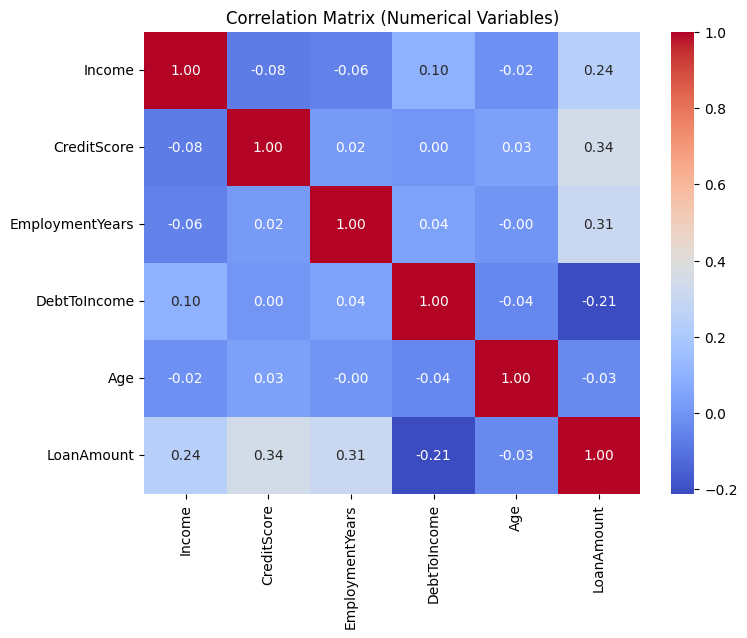

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Variables)")
plt.show()

# Correlation of each feature with LoanAmount

In [ ]:
target = "LoanAmount"

In [ ]:
significance_results = {
    col: stats.pearsonr(numerical_df[col], numerical_df["LoanAmount"])
    for col in numerical_df.columns if col != "LoanAmount"
}

In [ ]:
def interpret_strength(r):
    if abs(r) < 0.20:
        strength = "very weak"
    elif abs(r) < 0.40:
        strength = "weak"
    elif abs(r) < 0.60:
        strength = "moderate"
    elif abs(r) < 0.80:
        strength = "strong"
    else:
        strength = "very strong"
    direction = "positive" if r > 0 else "negative"
    return f"{strength} ({direction})"

# Correlation results for Pearson, Spearman, Kendall

In [ ]:
correlation_results = {}

for col in numerical_df.columns:
    if col != target:
        # Pearson
        r_p, p_p = stats.pearsonr(numerical_df[col], numerical_df[target])
        # Spearman
        r_s, p_s = stats.spearmanr(numerical_df[col], numerical_df[target])
        # Kendall
        r_k, p_k = stats.kendalltau(numerical_df[col], numerical_df[target])

        correlation_results[col] = {
            "Pearson r": round(r_p, 3),
            "Pearson p": round(p_p, 4),
            "Pearson Interpretation": interpret_strength(r_p),

            "Spearman r": round(r_s, 3),
            "Spearman p": round(p_s, 4),
            "Spearman Interpretation": interpret_strength(r_s),

            "Kendall r": round(r_k, 3),
            "Kendall p": round(p_k, 4),
            "Kendall Interpretation": interpret_strength(r_k)
        }

In [ ]:
correlation_df = pd.DataFrame(correlation_results).T
correlation_df

,Pearson r,Pearson p,Pearson Interpretation,Spearman r,Spearman p,Spearman Interpretation,Kendall r,Kendall p,Kendall Interpretation
Income,0.241,0.0,weak (positive),0.226,0.0,weak (positive),0.15,0.0,very weak (positive)
CreditScore,0.344,0.0,weak (positive),0.34,0.0,weak (positive),0.233,0.0,weak (positive)
EmploymentYears,0.309,0.0,weak (positive),0.301,0.0,weak (positive),0.205,0.0,weak (positive)
DebtToIncome,-0.212,0.0,weak (negative),-0.199,0.0,very weak (negative),-0.137,0.0,very weak (negative)
Age,-0.035,0.4372,very weak (negative),-0.038,0.4008,very weak (negative),-0.026,0.3893,very weak (negative)


# Executive Summary

The descriptive analysis of the loan dataset provides a clear statistical snapshot of customer attributes and loan amounts. Customers have an average income of about ₱60,000, a mean credit score of 701, and typically around 14 years of employment. Loan amounts average ₱87,500, with moderate variability across applicants. Debt-to-income ratios cluster around 0.30, reflecting generally balanced financial profiles.

**Measures of Central Tendency and Spread**

The descriptive statistics generated by df.describe() provide a clear summary of the dataset. For the 500 loan applicants, the average income is ₱60,102, with a wide variability reflected in a standard deviation of about ₱14,719. Credit scores average 701.6 with a standard deviation of 48.9, showing moderate variation across customers. Employment history averages 14 years, though it ranges from 0 to 29 years.

Loan amounts average ₱87,562, with a spread of roughly ₱13,021, indicating that while most loans cluster around the mean, some applicants receive significantly higher or lower amounts. Debt-to-income ratios are fairly consistent, with a mean of 0.299 and limited spread (σ ≈ 0.097). Age averages 42.5 years, ranging between 21 and 64, showing a balanced mix of younger and older applicants.

These measures highlight both the central tendencies (mean and median values) and the dispersion (standard deviation, range, and interquartile ranges), which are essential for identifying typical borrower profiles and potential outliers.

**Frequency Distribution**

**Correlation Matrix**

The correlation matrix shows how each numerical variable is related to others. Notably, LoanAmount is most positively correlated with CreditScore (r = 0.34), EmploymentYears (r = 0.31), and Income (r = 0.24), suggesting that higher income, longer employment, and better credit scores are associated with larger loan amounts. Conversely, DebtToIncome has a negative correlation (r = -0.21) with LoanAmount, indicating that higher debt burdens reduce loan amounts.

**Heatmap of Correlation Matrix**

The heatmap visually reinforces the correlation matrix, where stronger relationships are shown in deeper colors. It highlights that CreditScore and LoanAmount have the strongest positive link, while DebtToIncome stands out with its negative association with loan size.

**Pearson, Spearman, and Kendall Correlation Results**

This multi-method correlation test ensures robustness of results:

Pearson captures linear relationships.

Spearman captures monotonic (rank-based) relationships.

Kendall measures ordinal associations.
Across all three, CreditScore, EmploymentYears, and Income consistently show positive associations with LoanAmount, while DebtToIncome consistently shows a negative relationship. This consistency strengthens the reliability of the findings.